## Data analysis of Starcraft 2 replays

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

Setup and data cleaning

In [2]:
df=pd.read_csv("SkillCraft1_Dataset.csv")
df=df.replace('?', np.nan)
df

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.000000,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.000000,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.000000,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3390,10089,8,NaN,NaN,NaN,259.6296,0.020425,0.000743,9,0.000621,0.000146,0.004555,18.6059,42.8342,6.2754,46,0.000877,5,0.000000,0.000000
3391,10090,8,NaN,NaN,NaN,314.6700,0.028043,0.001157,10,0.000246,0.001083,0.004259,14.3023,36.1156,7.1965,16,0.000788,4,0.000000,0.000000
3392,10092,8,NaN,NaN,NaN,299.4282,0.028341,0.000860,7,0.000338,0.000169,0.004439,12.4028,39.5156,6.3979,19,0.001260,4,0.000000,0.000000
3393,10094,8,NaN,NaN,NaN,375.8664,0.036436,0.000594,5,0.000204,0.000780,0.004346,11.6910,34.8547,7.9615,15,0.000613,6,0.000000,0.000631


In [3]:
df[['Age',"HoursPerWeek","TotalHours"]]=df[['Age',"HoursPerWeek","TotalHours"]].astype("float")

## what is the difference between proffessionnal, GrandMaster and mean player?

In [4]:
df.loc[df['LeagueIndex']==8].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 3340 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                55 non-null     int64  
 1   LeagueIndex           55 non-null     int64  
 2   Age                   0 non-null      float64
 3   HoursPerWeek          0 non-null      float64
 4   TotalHours            0 non-null      float64
 5   APM                   55 non-null     float64
 6   SelectByHotkeys       55 non-null     float64
 7   AssignToHotkeys       55 non-null     float64
 8   UniqueHotkeys         55 non-null     int64  
 9   MinimapAttacks        55 non-null     float64
 10  MinimapRightClicks    55 non-null     float64
 11  NumberOfPACs          55 non-null     float64
 12  GapBetweenPACs        55 non-null     float64
 13  ActionLatency         55 non-null     float64
 14  ActionsInPAC          55 non-null     float64
 15  TotalMapExplored    

In [5]:
df.loc[df['LeagueIndex']==8].describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,55.000000,55.0,0.0,0.0,0.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,10051.509091,8.0,NaN,NaN,NaN,267.341236,0.020981,0.000937,7.345455,0.000376,0.000831,0.005237,18.969773,35.390153,5.676727,22.854545,0.001077,6.127273,0.000026,0.000135
std,25.894281,0.0,NaN,NaN,NaN,56.183006,0.009299,0.000349,2.110101,0.000295,0.000861,0.000995,6.083925,5.792082,1.017115,6.918623,0.000440,1.764407,0.000078,0.000246
min,10001.000000,8.0,NaN,NaN,NaN,146.389200,0.004582,0.000266,4.000000,0.000000,0.000023,0.003142,8.164200,24.093600,3.837100,10.000000,0.000478,3.000000,0.000000,0.000000
25%,10028.500000,8.0,NaN,NaN,NaN,222.228600,0.014308,0.000683,6.000000,0.000173,0.000330,0.004490,15.102150,31.282950,4.929500,18.500000,0.000785,5.000000,0.000000,0.000000
50%,10052.000000,8.0,NaN,NaN,NaN,274.340400,0.019817,0.000874,7.000000,0.000350,0.000569,0.005281,17.990100,35.409400,5.587200,23.000000,0.000950,6.000000,0.000000,0.000000
75%,10072.500000,8.0,NaN,NaN,NaN,313.278300,0.028263,0.001158,10.000000,0.000498,0.000992,0.005730,21.774100,38.579100,6.457500,26.500000,0.001270,7.000000,0.000000,0.000128
max,10095.000000,8.0,NaN,NaN,NaN,375.866400,0.042576,0.001752,10.000000,0.001242,0.004041,0.007780,35.412700,54.558800,7.961500,46.000000,0.002459,11.000000,0.000457,0.000959


In [6]:
# df.loc[df['LeagueIndex']==7].info()

In [7]:
# df.loc[df['LeagueIndex']==7].describe()

In [8]:
# df.loc[df['LeagueIndex']==7].describe().mean()

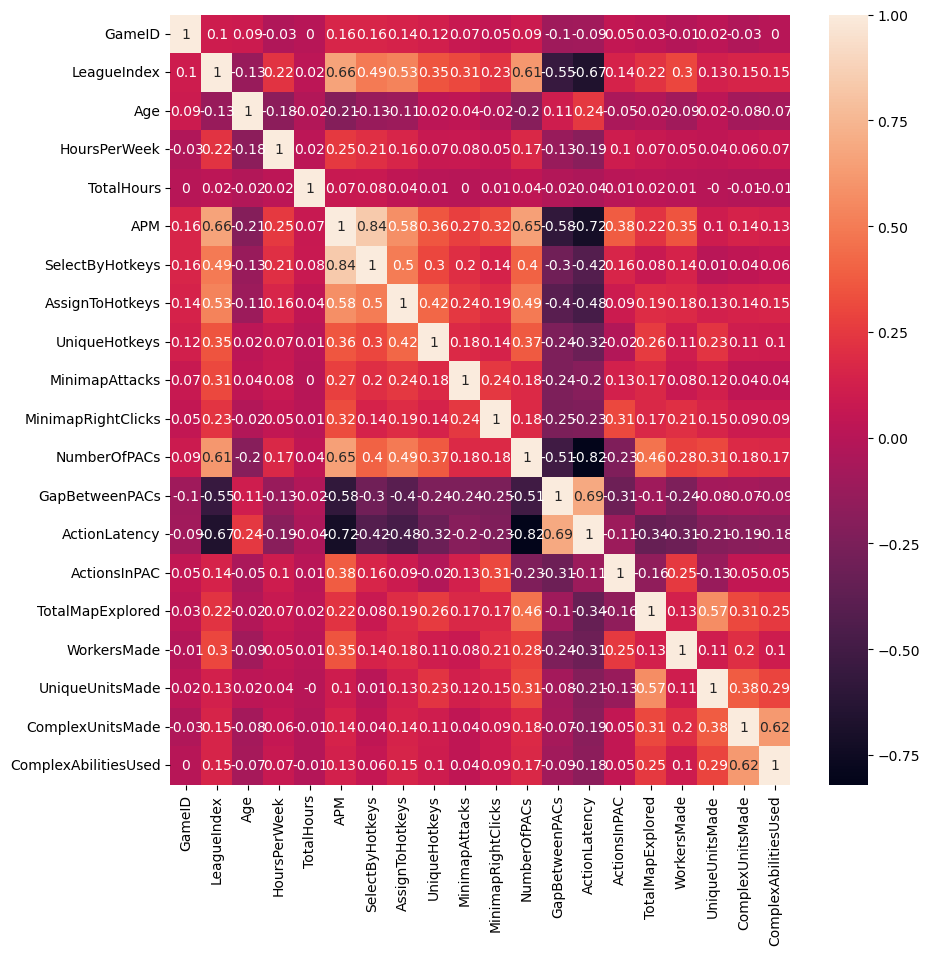

In [16]:
import seaborn as sns

fig = plt.figure(figsize=(10,10))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

plt.show()

In [11]:
mean_HoursPerWeek=[]
mean_TotalHours=[]
mean_Age=[]

mean_APM=[]
mean_MinimapAttacks=[]
mean_NumberOfPACs=[]

mean_GapBetweenPACs=[]
mean_ActionLatency=[]
mean_TotalMapExplored=[]


for k in range(1,9):
    x=df.loc[df['LeagueIndex']==k]['HoursPerWeek'].mean()
    mean_HoursPerWeek.append(x)
    x=df.loc[df['LeagueIndex']==k]['TotalHours'].mean()
    mean_TotalHours.append(x)
    x=df.loc[df['LeagueIndex']==k]['Age'].mean()
    mean_Age.append(x)
    
    x=df.loc[df['LeagueIndex']==k]['APM'].mean()
    mean_APM.append(x)
    x=df.loc[df['LeagueIndex']==k]['MinimapAttacks'].mean()
    mean_MinimapAttacks.append(x)
    x=df.loc[df['LeagueIndex']==k]['NumberOfPACs'].mean()
    mean_NumberOfPACs.append(x)
    
    x=df.loc[df['LeagueIndex']==k]['GapBetweenPACs'].mean()
    mean_GapBetweenPACs.append(x)
    x=df.loc[df['LeagueIndex']==k]['ActionLatency'].mean()
    mean_ActionLatency.append(x)
    x=df.loc[df['LeagueIndex']==k]['TotalMapExplored'].mean()
    mean_TotalMapExplored.append(x)
    print(x)

18.730538922155688
19.824207492795388
20.50632911392405
22.01972872996301
23.075682382133994
24.30756843800322
28.02857142857143
22.854545454545455


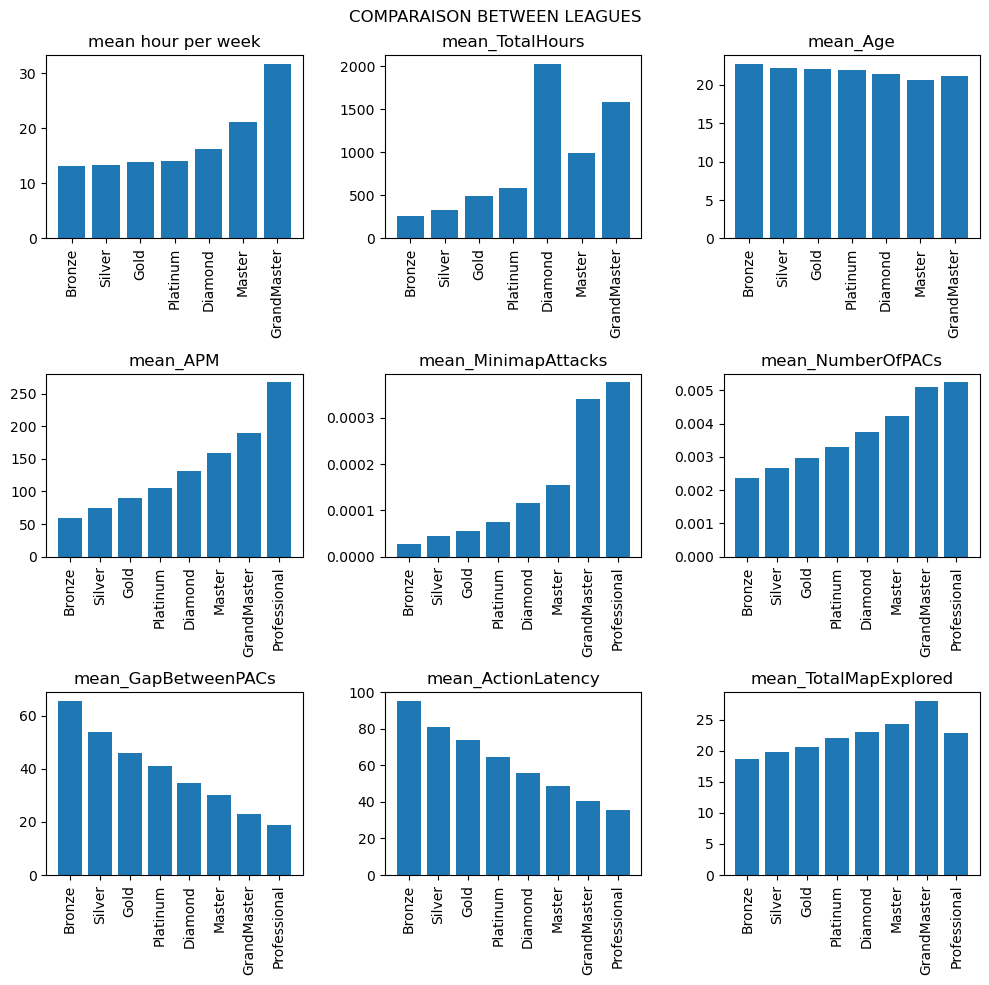

In [12]:
import seaborn as sns

keys1 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond', 'Master', 'GrandMaster', 'Professional']

fig, axes = plt.subplots(nrows=3,ncols=3,figsize=(10,10))
fig.suptitle('COMPARAISON BETWEEN LEAGUES')

axes[0,0].bar(keys1,mean_HoursPerWeek)
axes[0,0].set_title('mean hour per week')
axes[0,0].tick_params(axis='x', rotation=90)
axes[0,1].bar(keys1,mean_TotalHours)
axes[0,1].set_title('mean_TotalHours')
axes[0,1].tick_params(axis='x', rotation=90)
axes[0,2].bar(keys1,mean_Age)
axes[0,2].set_title('mean_Age')
axes[0,2].tick_params(axis='x', rotation=90)



axes[1,0].bar(keys1,mean_APM)
axes[1,0].set_title('mean_APM')
axes[1,0].tick_params(axis='x', rotation=90)
axes[1,1].bar(keys1,mean_MinimapAttacks)
axes[1,1].set_title('mean_MinimapAttacks')
axes[1,1].tick_params(axis='x', rotation=90)
axes[1,2].bar(keys1,mean_NumberOfPACs)
axes[1,2].set_title('mean_NumberOfPACs')
axes[1,2].tick_params(axis='x', rotation=90)

mean_GapBetweenPACs
mean_ActionLatency
mean_TotalMapExplored

axes[2,0].bar(keys1,mean_GapBetweenPACs)
axes[2,0].set_title('mean_GapBetweenPACs')
axes[2,0].tick_params(axis='x', rotation=90)

axes[2,1].bar(keys1,mean_ActionLatency)
axes[2,1].set_title('mean_ActionLatency')
axes[2,1].tick_params(axis='x', rotation=90)

axes[2,2].bar(keys1,mean_TotalMapExplored)
axes[2,2].set_title('mean_TotalMapExplored')
axes[2,2].tick_params(axis='x', rotation=90)

fig.tight_layout()